# Deep Dive into Deep Learning: Fine-tuning a Large Language Model for Housing Price Prediction

**Welcome to the world of Large Language Models!**

In this project, you'll get a hands-on in building a state-of-the-art AI system capable of predicting housing prices. This challenge will immerse you in the core concepts of modern Natural Language Processing (NLP).

## Prerequisites: A Foundation for Exploration

This project assumes a basic familiarity with Python programming and Machine Learning.  While prior experience with deep learning libraries is beneficial, it's not strictly required, as we'll guide you through the essential concepts and techniques.

**Here's a breakdown of the key prerequisites and resources to help you get started:**

### 1. Machine Learning and Deep Learning:  The Power of Pattern Recognition

*   **Machine Learning: From the Data Up**
  
  Machine learning algorithms grow models that realize rules and patterns from data without explicit programming. That is, instead of implementing rules based on human knowledge, we feed these algorithms large datasets, allowing them to identify trends on their own, with little expert's involvement. The aim of doing Machine Learning is to make predictions that are consistent with past and future observations.
*   **Deep Learning: A Revolution in Artificial Intelligence**

  Deep learning represents a powerful subset of machine learning that utilizes artificial neural networks – with computational structures inspired by the human brain – to model intricate patterns and relationships within data.  Deep learning has driven remarkable breakthroughs in computer vision, natural language processing, and countless other domains.
    *   **Further Reading:** [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville provides a comprehensive introduction to the field.

### 2. The Natural Language Modeling Task: Teaching Machines to Understand Human Language

*   **Decoding the Essence of Language**

  Natural language processing (NLP) focuses on bridging the gap between human language and computer understanding. It encompasses a wide range of tasks, from simple text classification to machine translation and question answering.
*   **The Power of Deep Learning in NLP**

  Deep learning models, particularly those based on the Transformer architecture (more on that below!), have revolutionized NLP. Their ability to capture long-range semantic dependencies and intricate syntactic structures has led to significant improvements in language understanding and generation.
    *   **Further Reading:**  The Stanford CS224N course ([Website](http://web.stanford.edu/class/cs224n/)) offers slides and notes that serve as a fantastic deep dive into NLP with deep learning.

### 3. Transformers: The Architecture Reshaping NLP

*   **Beyond Recurrent Networks**

  Traditional recurrent neural networks (RNNs) faced challenges in processing long sequences of text due to their sequential nature. Transformers, introduced in the groundbreaking paper "Attention Is All You Need" ([Paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)), addressed these limitations by leveraging an innovative self-attention mechanism.
*   **Attention is All You Need**  

  Self-attention allows the model to weigh the importance of different words in a sentence when processing information, enabling it to capture relationships and dependencies across long distances efficiently. This breakthrough architecture has become the workhorse of modern NLP solutions.

  We will be working with the T5 model in this project. It is a generic encoder-decoder Transformer model commonly used by researchers and academics to study the extend of machine language modeling.

### 4. Hugging Face, PyTorch, and the Power of Open-Source AI

*   **Hugging Face Transformers: Your Gateway to NLP**

  Hugging Face provides a powerful and user-friendly library ([Hugging Face Documentation](https://huggingface.co/docs/transformers/index)) that simplifies the use of pre-trained Transformer models for various NLP tasks.  You'll use it extensively throughout this project.
*   **PyTorch: A Powerful Auto-Diff Framework**

  PyTorch is a widely adopted deep learning framework known for its dynamic computation graph and intuitive API. Its auto-differentiation capabilities streamline the process of calculating gradients, a critical aspect of training large neural networks with complex computation structures.
    *   **Further Reading:**  The official [PyTorch Tutorials](https://pytorch.org/tutorials/) are an excellent resource for getting started.

### 5. The Deep Learning Training Pipeline: A Step-by-Step Guide

1.  **Data Preparation:**  Transforming raw data into a format suitable for training a deep learning model, often involving cleaning missing or invalid data values, data normalization, and splitting into training, validation, and test sets.
2.  **Model Selection:** Choosing an appropriate model architecture (in our case, a pre-trained Transformer) based on the task/dataset characteristics. This is where the expert's intuition comes in, but at a very high level.
3.  **Loss Function and Optimizer:** Defining a loss function that continuously quantifies the model's errors during training and selecting an optimization algorithm (typically Stochastic Gradient Descent and variations) to adjust the model's parameters and minimize this loss function.
4.  **Training:** Feeding the training data through the model - in batches or all at once, calculating the loss, and using backpropagation to update the model's weights. We typically need to do these steps many times.
5.  **Validation:**  Evaluating the model's performance on a separate validation set to tune hyperparameters and prevent overfitting (where the model memorizes the training data so it fails to generalize to unseen examples).
6.  **Testing:** Assessing the model's final performance on a held-out test set to provide an unbiased estimate of its generalization correctness. These test examples should not have been used in tuning the model's parameters nor its hyperparameters.

### 6. Project Goals: Unveiling the Apparent Magic of Deep Learning

In this project, our aim is to provide you with practical experience and a deeper understanding of:

*   **Fine-tuning Pretrained Language Models:** You'll learn how to adapt a powerful pre-trained language model (T5) to a specific task, scientific question answering, by training it on a relevant dataset.
*   **Hyperparameter Tuning:** Experimenting with different training settings to optimize your model's performance.
*   **Evaluating Model Performance:** Using appropriate metrics to assess your model's effectiveness.
*   **Model Interpretability:** Gaining insights into how your model makes decisions, particularly by visualizing the attention mechanism within the Transformer architecture.

**To be successful at this project's learning goals, we expect that you read the description of each section, run every code block sequentially from top to bottom (you can check if your implementation is correct by compare and contrast with the provided outputs), and complete the TODOs and final report. In addition, we highly encourage you to break free from the provided starter code and implement additional features for data augmnetation, model interpretability and visualization, etc. Happy deep diving!**

In [6]:
!pip install transformers tqdm # Install necessary libraries (Run this cell first)

In [7]:
import os # For interacting with the operating system
import pandas as pd # For data storage, manipulation, and fast analysis
from transformers import T5Tokenizer, T5ForConditionalGeneration # For the T5 model
from torch.utils.data import Dataset, DataLoader # For making custom datasets
from tqdm import tqdm # For visualizing training/testing progress bar
import torch # PyTorch library for deep learning
import sklearn # For fast initialization of machine learning models and algorithms
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For plotting heatmaps
import warnings # For printing warning messages

# Part 1: Data Preparation & Preprocessing
1. Load the Boston Housing Dataset

Download the [Boston Housing Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/input), upload it to your Colab environment, and use the correct path name to programmatically access that file (should be a csv file) during runtime. If you would like to learn what the column names mean or the dataset origin, please visit [this link](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) (it is highly recommended that you intimately understand the dataset you are working with).

Remember that our task is to train a model that can predict the price of houses given other attributes/features of those houses. That is, the last column of this data is what we aim to make the model correctly predict given the other columns.

In [20]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names) # Replace with the appropriate path if necessary

# Inspect the dataframe
print(data.head()) # Display the first few rows of the dataset
print()
print("Dataset dimensions:", data.shape) # Display the number of rows and columns in the dataset
print()
print(data.info()) # Display information about the dataset (data types, missing values of each column, etc.)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset dimensions: (506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    

2. Define a function to transform the dataset

If you have been in Machine Learning for some time, you might have notice that price prediction is a regression task, which means the model should output continuous numerical values. However, T5 is a language model, which means it outputs discrete text tokens. We will handle this discrepancy in modality in the later section. For now, we need to convert the given numerical data format to the textual data format so our T5 model can consume this data.

We need to do the following data processing steps:
-  Combining Text: We combine the features into a single text string because the T5 model expects a single natural language string as input. The T5 model also outputs a single natural language string so we also need to make the ground-truth label a text string so we can supervise the model outputs versus the ground-truth labels.
- Pandas DataFrame: We convert this data into a [Pandas DataFrame](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) for efficient data manipulation and to easily feed the data into our training pipeline later.

In [21]:
def reformat_dataset(data: pd.DataFrame) -> pd.DataFrame:

    formatted_data = []
    for _, row in data.iterrows():

        ########################################################################
        # TODO: create the input string from part of the values in 'row'.
        # You must not give the model the last column value
        # as that is what we want the model to predict.
        input_string = ', '.join([f"{row[col]}" for col in data.columns[:-1]])
        ########################################################################

        ########################################################################
        # TODO: create the output string from part of the values in 'row'.
        # This string should contain the value in
        # the last column without any additional text so we can easily convert
        # the trained model's output to floating point values later
        output_string = str(row[data.columns[-1]])
        ########################################################################

        formatted_data.append((input_string, output_string))

    return pd.DataFrame(formatted_data)

3. Split the data into training, validation, and test sets

It's essential to divide our data into three separate sets: training, validation, and test. Let's understand why this is crucial:

- Training Data:  This is the largest portion of our data, used to directly train the model's parameters.
- Validation Data: Held separate from the training data, this set is used to fine-tune the model's hyperparameters (like learning rate, batch size, epochs) and get an early sense of its performance on unseen data.
- Test Data: The most important subset! It's kept hidden from the model during training and validation and used only at the very end to provide an unbiased evaluation of the final model's performance.

To efficiently feed our data to the T5 model during training, we'll create a custom dataset class and a data collate function. They handle the extraction and tokenization of our text data and organizes it into a format readily consumable by the PyTorch DataLoader.

**Key Benefits of Defining a Custom Dataset Class and a Data Collate Function**
- Organized Data Loading:  Simplifies the process of accessing and preparing data batches during training. Especially when the data may be coming in various format (e.g. dictionaries, lists, dataframes, etc.).
- On-the-Fly Tokenization:  Performs tokenization (more on this in the next section) and sequence length padding efficiently when a data sample is requested.
- Integration with DataLoader:  Works seamlessly with PyTorch's DataLoader for data multi-processing and data shuffling.

In [22]:
class OurDataset(Dataset):
    def __init__(self, data: pd.DataFrame):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, at_index: int) -> dict:
        item_at_index = dict.fromkeys(['text', 'label'])

        ########################################################################
        # TODO: Get the input string at the given index out of the Pandas
        # DataFrame and add it into a dictionary
        # store this input string with the key 'text'
        item_at_index['text'] = self.data.loc[at_index][0]
        ########################################################################

        ########################################################################
        # TODO: Get the output string at the given index out of the Pandas
        # DataFrame and add it into a dictionary
        # store this output string with the key 'label'
        item_at_index['label'] = self.data.loc[at_index][1]
        ########################################################################

        # Return the item dictionary to the dataloader for batching
        return item_at_index

In [23]:
from sklearn.model_selection import train_test_split

# Split and process each partition of the dataset individually
# Train data is used to train model's parameters
# Val data is used pick model's hyperparameters
# Test data is used to evaluate the model's performance
train_data, val_test_data = train_test_split(data, test_size=0.2, random_state=42)  # Split into train and temp sets
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)  # Split temp into val and test sets

# Apply the reformatting function
train_data = reformat_dataset(train_data)
val_data = reformat_dataset(val_data)
test_data = reformat_dataset(test_data)

# Create our custom datasets
train_data = OurDataset(train_data)
val_data = OurDataset(val_data)
test_data = OurDataset(test_data)

print("Training data size:", len(train_data))
print("First train datapoint\n", train_data[0])
print("Validation data size:", len(val_data))
print("First val datapoint\n", val_data[0])
print("Test data size:", len(test_data))
print("First test datapoint\n", test_data[0])

Training data size: 404
First train datapoint
 {'text': '15.0234, 0.0, 18.1, 0.0, 0.614, 5.304, 97.3, 2.1007, 24.0, 666.0, 20.2, 349.48, 24.91', 'label': '12.0'}
Validation data size: 51
First val datapoint
 {'text': '0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98', 'label': '24.0'}
Test data size: 51
First test datapoint
 {'text': '0.13914, 0.0, 4.05, 0.0, 0.51, 5.572, 88.5, 2.5961, 5.0, 296.0, 16.6, 396.9, 14.69', 'label': '23.1'}


In [24]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")  # Load the tokenizer for the 'collate_fn' context


def collate_fn(batch):
    # Tokenize datapoints in batch, we do padding depending on longest sequence
    # in the batch
    text = tokenizer([datapoint['text'] for datapoint in batch], padding=True, return_tensors='pt')
    labels = tokenizer([datapoint['label'] for datapoint in batch], padding=True, return_tensors='pt')
    return {'input_ids': text['input_ids'], 'attention_mask': text['attention_mask'], 'labels': labels['input_ids']}

# Part 2: Model Fine-tuning

1. Load the pre-trained T5-small model and tokenizer

In this project, we'll be working with the "T5-small" model, a lightweight but powerful Transformer-based language model developed by Google.  Let's see what makes T5 ([Documentation](https://huggingface.co/docs/transformers/en/model_doc/t5)) special and why it's well-suited for our task.

**T5 Architecture and Training: A Versatile Language Model**

- Encoder-Decoder Structure:  As introduced in [Attention Is All You Need](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf), T5 consists of two main components: an encoder that processes the input text into a context vector and a decoder that autoregressively generates the output text based on the context vector and generated texts.
- Text-to-Text Framework: What sets T5 apart is its pre-training approach. It was pre-trained on a massive dataset of text-to-text tasks, where it learns various NLP tasks (translation, summarization, question answering) in a unified text-to-text format.
    - C4 Dataset:  T5 is pre-trained on the [Colossal Clean Crawled Corpus (C4)](https://huggingface.co/datasets/allenai/c4), a vast dataset of text and code scraped from the entier internet. This extensive and diverse training data makes T5 remarkably versatile and capable of adapting to various NLP tasks.

**The Role of the Tokenizer**

- Bridging the Gap Between Text and Vectors:  Deep learning models operate on numerical vectors, not raw text. The tokenizer acts as a translator between the two.
- Vocabulary and Tokenization:  It has a predefined vocabulary (a mapping between words or subwords and numerical IDs). The tokenizer splits the input text into individual tokens (words or subwords) and converts them into their corresponding numerical IDs. The model can then convert these IDs into the corresponding vector using its trainable look-up table.

You may wonder: how can these vectors stand in place of words? The magic happened when the model was pre-trained on the internet, it learns to map semantically related words (typically used in similar contexts) to similar vectors, while words that are unrelated are mapped to othorgonal vectors.

In [25]:
model = T5ForConditionalGeneration.from_pretrained("t5-small")  # Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model.to(device)  # Move the model to the device
model_p_count = sum([p.numel() for p in filter(lambda p: p.requires_grad, model.parameters())])

print(f"Model has {model_p_count:,} trainable parameters.")  # Print the number of trainable parameters in T5
print(f"Tokenizer has a vocabulary of {len(tokenizer.get_vocab())} tokens.") # Print the tokenizer's states
print()

# Let's see how to tokenizer works on example strings
# You may notice that a token is approximately a word (but not really),
# this is so that the model learns the compositionality of the human language
s1 = "I wish birds can perform the blues when Spring comes!"
s2 = "0.123, 903, 100, -43.32"
print(f"Tokens of the sentence \"{s1}\" are:\n{tokenizer.tokenize(s1)}")
print()
print(f"Tokens of the sentence \"{s2}\" are:\n{tokenizer.tokenize(s2)}")
print()

# Let's see the IDs those tokens are associated with
# You may notice there is an extra token ID 1 at the end of the 2 sentences,
# that is the special end-of-sentence token that allows the model to learn
# when to stop prolonging the sentence
print(f"Vocab IDs of the sentence \"{s1}\" are:\n{tokenizer(s1)['input_ids']}")
print()
print(f"Vocab IDs of the sentence \"{s2}\" are:\n{tokenizer(s2)['input_ids']}")
print()

# Let's check the embedding of two similar words versus two disimilar words
# We know these words are to be tokenized into single tokens and we ignore the
# end-of-sentence token
word1 = "cat"
word2 = "kitten"
word3 = "high"
word4 = "low"
embedded_vector1 = model.get_input_embeddings()(torch.tensor([tokenizer(word1)['input_ids'][0]], device=model.get_input_embeddings().weight.device))
embedded_vector2 = model.get_input_embeddings()(torch.tensor([tokenizer(word2)['input_ids'][0]], device=model.get_input_embeddings().weight.device))
embedded_vector3 = model.get_input_embeddings()(torch.tensor([tokenizer(word3)['input_ids'][0]], device=model.get_input_embeddings().weight.device))
embedded_vector4 = model.get_input_embeddings()(torch.tensor([tokenizer(word4)['input_ids'][0]], device=model.get_input_embeddings().weight.device))
# The cosine similarity will return a value between -1 and 1:
# a value closer to 1 indicates very aligned,
# closer to -1 means very disaligned,
# and closer to 0 means unrelated words
print(f"Cosine similarity score between "
      f"\"{word1}\" and \"{word2}\": {torch.nn.functional.cosine_similarity(embedded_vector1, embedded_vector2).item()}")
print()
print(f"Cosine Similarity score between "
      f"\"{word1}\" and \"{word3}\": {torch.nn.functional.cosine_similarity(embedded_vector1, embedded_vector3).item()}")
print()
print(f"Cosine Similarity score between "
      f"\"{word3}\" and \"{word4}\": {torch.nn.functional.cosine_similarity(embedded_vector3, embedded_vector4).item()}")
print()

Model has 60,506,624 trainable parameters.
Tokenizer has a vocabulary of 32100 tokens.

Tokens of the sentence "I wish birds can perform the blues when Spring comes!" are:
['▁I', '▁wish', '▁birds', '▁can', '▁perform', '▁the', '▁blue', 's', '▁when', '▁Spring', '▁comes', '!']

Tokens of the sentence "0.123, 903, 100, -43.32" are:
['▁0.', '123', ',', '▁90', '3,', '▁100', ',', '▁', '-', '43', '.', '32']

Vocab IDs of the sentence "I wish birds can perform the blues when Spring comes!" are:
[27, 1663, 6331, 54, 1912, 8, 1692, 7, 116, 4328, 639, 55, 1]

Vocab IDs of the sentence "0.123, 903, 100, -43.32" are:
[4097, 14574, 6, 2777, 6355, 910, 6, 3, 18, 4906, 5, 2668, 1]

Cosine similarity score between "cat" and "kitten": 0.4431859254837036

Cosine Similarity score between "cat" and "high": 0.0012265145778656006

Cosine Similarity score between "high" and "low": 0.6634554862976074



2. Define training hyperparameters

Now that we've loaded our pre-trained T5 model, let's dive into the process of fine-tuning it on our dataset. A crucial part of this process involves understanding and setting appropriate hyperparameters.

**Hyperparameter Deep Dive: Navigating the Training Landscape**

Hyperparameters are like the control knobs of our training process. They influence how the model learns from the data.  Let's explore three essential hyperparameters:

- Learning Rate: This hyperparameter determines how big of a step we update the model's parameters in the direction of minimizing the model's loss during each training iteration.
- Smaller Learning Rate (e.g., 1e-5): The model learns more slowly but might find a more precise solution.
- Larger Learning Rate (e.g., 1e-3): Faster learning, but the model might overshoot the optimal solution and not converge well.
- Batch Size: Instead of feeding the entire training dataset to the model at once, we divide it into smaller groups called batches.
- Smaller Batch Size (e.g., 8, 16): Requires less memory, but updates to the model's parameters can be noisy.
- Larger Batch Size (e.g., 32, 64): More computationally efficient, smoother updates, but might require more memory.
- Epochs: An epoch represents one complete pass through the entire training dataset.
- Too Few Epochs: The model might underfit the data, meaning it hasn't learned the patterns well enough.
- Too Many Epochs: The model might overfit the data, memorizing the training examples but performing poorly on unseen data.

Finding the optimal balance for these hyperparameters often involves experimentation and observing the model's performance on the validation set.

In [26]:
learning_rate = 1e-4  # Change this as you like
batch_size = 16  # Change this as you like
epochs = 150  # Change this as you like, you might want to train much longer to get adequate accuracy

# Regularization with weight decay
weight_decay = 1e-4  # Regularization parameter

3. Define training loop

Now that we have our data, model, and hyperparameters set, it's time to bring them all together in the training loop. This loop is where the magic happens - it's where our T5 model learns from the data to become proficient in housing price prediction.

**Training Phase**
1. Set the model to training mode
2. Clear any previously calculated gradients
3. Extract data from dataloader and move them to the correct device
4. Forward Pass: Calculate the model's predictions
5. Calculate how far off the predictions are
6. Backward Pass: Calculate gradients for each parameter
7. Update Model Parameters:  Adjust model parameters to minimize the loss

**Validation Phase**
1. After each epoch, we evaluate the model's progress on the validation set
2. Set the model to evaluation mode (no parameter updates)
3. Disable gradient calculation to save memory
4. Similar to the training loop, but we aim to calculate the matching between model's predictions and ground-truth labels without any parameter adjustments

Normally, evaluating the next-token prediction capability of a language model requires the [BLEU and ROUGE metrics](https://medium.com/@raniahossam/cracking-the-code-of-text-evaluation-unveiling-the-magic-of-rouge-metrics-bb0c687f479f). However, in our case, this metric would not be appropriate as we want the error between the model's numerical values versus the ground-truth price.

For example, the model's prediction of "cat.2" versus a ground-truth label of "245.2" should be a 0 accuracy score in our case instead of a 0.5 score that the ROUGE metric would assign. Instead, we must convert the model's output and ground-truth label into numerical values, then using an appropriate regression metric - [R-squared](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html) - to evaluate the model's performance (it is highly recommended that you understand how this metric behaves for certain model's behaviors so you can answer questions in the final report).

Hint: If your implementation is correct so far, you should expect the model to fail to output (only) floating-point numbers at first, which is considered negative infinity validation score for obvious reasons, and only output numbers as the training progresses (but very lousy numbers), which allows for a non-infinity but moderately large negative validation score. As the model gets better at predicting house prices, you should see the validation score becomes positive and converges toward 1.

**Checkpointing: Model saving and loading**

Training LLMs can take a long time, sometimes hours or days! Checkpointing helps us to:

- Save Our Progress:  Regularly saving checkpoints allows us to resume training from the last saved point if an interruption occurs (e.g., power outage, system crash).
- Capture the Best Model: By saving the model with the highest validation score so far, we can keep track of our best-performing model during training while avoiding training degradation.

**IMPORTANT NOTE** If you left your Colab environment unattended for some time, it may delete your saved files. I recommend that you regularly backup your files by downloading them onto your computer's drive once in a while, and reupload them to Colab if your files are deleted by Colab.

In [27]:
CHECKPOINT_PATH = './trained_model.pth'
DATALOADER_PATH = './dataloaders.pth'

In [28]:
def train_model(model, optimizer, train_dataloader, val_dataloader, epochs, best_accuracy):
    """Trains the model and evaluates on the validation set. Returned trained model and loss/validation progress."""
    loss_progress = []
    val_progress = []
    for epoch in range(start_epoch - 1, epochs):
        model.train()  # Trigger training mode (enable gradient tracking)
        total_loss = 0
        progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
        for batch in progress_bar:
            optimizer.zero_grad()
            # Get necessary arguments out of 'batch', feed them to model, to obtain the model's output
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            model_outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = model_outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            progress_bar.set_postfix({'loss': loss.item()})  # Update progress bar

        avg_train_loss = total_loss / len(train_dataloader)
        loss_progress.append(avg_train_loss)
        print(f"Epoch {epoch + 1}/{epochs} - Avg. Training Loss: {avg_train_loss:.4f}")

        # Validation
        model.eval()  # Trigger testing mode (disable gradient tracking)
        total_val_accuracy = 0
        progress_bar = tqdm(val_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
        for batch in progress_bar:
            # Get necessary arguments out of 'batch', feed them to model, to obtain the model's output
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Call HuggingFace's special 'generate' method to do autoregressive sampling of next tokens
            # Note that this method is not differentiable/trainable as it performs discrete operations
            # such as token sampling and sequence path searching. Documentation here:
            # https://huggingface.co/docs/transformers/en/main_classes/text_generation
            generate_outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=10)

            decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
            decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

            # Compute the R-squared score between the predicted strings and label strings
            # We turn these strings into float for the R-squared computation
            # but if model's output cannot be converted to a float,
            # we can consider that an infinite error (accuracy = -infinity)
            try:
              predicted_values = [float(pred) for pred in decoded_preds]
              actual_values = [float(label) for label in decoded_labels]
              val_score = sklearn.metrics.r2_score(predicted_values, actual_values)
            except ValueError:
              val_score = float('-inf')
            total_val_accuracy += val_score
            progress_bar.set_postfix({'accuracy': val_score})  # Update progress bar

        val_accuracy = total_val_accuracy / len(val_dataloader)
        val_progress.append(val_accuracy)
        print(f"Epoch {epoch + 1}/{epochs} - Avg. Validation Accuracy: {val_accuracy:.4f}")

        # Best-so-far Model Checkpointing
        if val_accuracy >= best_accuracy:
            print(f"New latest and best accuracy! Saving model checkpoint to {CHECKPOINT_PATH}")
            best_accuracy = val_accuracy
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_train_loss,
                'accuracy': best_accuracy,
            }, CHECKPOINT_PATH)

    return model, loss_progress, val_progress  # Return the trained model

<ipython-input-29-5d7f818df78f>:17: UserWarning: 

No model checkpoint found.
Starting from scratch.
  warnings.warn("\n\nNo model checkpoint found.\nStarting from scratch.")
<ipython-input-29-5d7f818df78f>:36: UserWarning: 

Starting with new data order and data slit.
  warnings.warn("\n\nStarting with new data order and data slit.")


Epoch 1/150 - Avg. Training Loss: 5.2210


Epoch 1/150 - Avg. Validation Accuracy: -inf
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/150 - Avg. Training Loss: 2.5140


Epoch 2/150 - Avg. Validation Accuracy: -1.6322
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 3/150 - Avg. Training Loss: 2.1555


Epoch 3/150 - Avg. Validation Accuracy: -90.5995


Epoch 4/150 - Avg. Training Loss: 1.9880


Epoch 4/150 - Avg. Validation Accuracy: -90.5995


Epoch 5/150 - Avg. Training Loss: 1.8905


Epoch 5/150 - Avg. Validation Accuracy: -90.5995


Epoch 6/150 - Avg. Training Loss: 1.8339


Epoch 6/150 - Avg. Validation Accuracy: -76.0458


Epoch 7/150 - Avg. Training Loss: 1.7878


Epoch 7/150 - Avg. Validation Accuracy: -204.9214


Epoch 8/150 - Avg. Training Loss: 1.8657


Epoch 8/150 - Avg. Validation Accuracy: -67.2887


Epoch 9/150 - Avg. Training Loss: 1.7375


Epoch 9/150 - Avg. Validation Accuracy: -24.0706


Epoch 10/150 - Avg. Training Loss: 1.6769


Epoch 10/150 - Avg. Validation Accuracy: -16.0678


Epoch 11/150 - Avg. Training Loss: 1.7574


Epoch 11/150 - Avg. Validation Accuracy: -3.7459


Epoch 12/150 - Avg. Training Loss: 1.7026


Epoch 12/150 - Avg. Validation Accuracy: -1.9535


Epoch 13/150 - Avg. Training Loss: 1.6649


Epoch 13/150 - Avg. Validation Accuracy: -1.9334


Epoch 14/150 - Avg. Training Loss: 1.6692


Epoch 14/150 - Avg. Validation Accuracy: -1.9687


Epoch 15/150 - Avg. Training Loss: 1.6451


Epoch 15/150 - Avg. Validation Accuracy: -2.9428


Epoch 16/150 - Avg. Training Loss: 1.6112


Epoch 16/150 - Avg. Validation Accuracy: -1.3689
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 17/150 - Avg. Training Loss: 1.5933


Epoch 17/150 - Avg. Validation Accuracy: -1.9679


Epoch 18/150 - Avg. Training Loss: 1.5814


Epoch 18/150 - Avg. Validation Accuracy: -1.9783


Epoch 19/150 - Avg. Training Loss: 1.6291


Epoch 19/150 - Avg. Validation Accuracy: -1.3549
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 20/150 - Avg. Training Loss: 1.5414


Epoch 20/150 - Avg. Validation Accuracy: -0.9794
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 21/150 - Avg. Training Loss: 1.5819


Epoch 21/150 - Avg. Validation Accuracy: -1.3178


Epoch 22/150 - Avg. Training Loss: 1.5682


Epoch 22/150 - Avg. Validation Accuracy: -1.0246


Epoch 23/150 - Avg. Training Loss: 1.5739


Epoch 23/150 - Avg. Validation Accuracy: -0.6350
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 24/150 - Avg. Training Loss: 1.5237


Epoch 24/150 - Avg. Validation Accuracy: -0.6843


Epoch 25/150 - Avg. Training Loss: 1.5812


Epoch 25/150 - Avg. Validation Accuracy: -0.7302


Epoch 26/150 - Avg. Training Loss: 1.4690


Epoch 26/150 - Avg. Validation Accuracy: -0.5824
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 27/150 - Avg. Training Loss: 1.4374


Epoch 27/150 - Avg. Validation Accuracy: -0.4132
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 28/150 - Avg. Training Loss: 1.4689


Epoch 28/150 - Avg. Validation Accuracy: -0.2793
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 29/150 - Avg. Training Loss: 1.4679


Epoch 29/150 - Avg. Validation Accuracy: -0.1208
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 30/150 - Avg. Training Loss: 1.4163


Epoch 30/150 - Avg. Validation Accuracy: -0.4687


Epoch 31/150 - Avg. Training Loss: 1.3609


Epoch 31/150 - Avg. Validation Accuracy: -0.2112


Epoch 32/150 - Avg. Training Loss: 1.4108


Epoch 32/150 - Avg. Validation Accuracy: -0.2109


Epoch 33/150 - Avg. Training Loss: 1.3822


Epoch 33/150 - Avg. Validation Accuracy: -0.0608
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 34/150 - Avg. Training Loss: 1.3911


Epoch 34/150 - Avg. Validation Accuracy: -0.3864


Epoch 35/150 - Avg. Training Loss: 1.3169


Epoch 35/150 - Avg. Validation Accuracy: 0.1068
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 36/150 - Avg. Training Loss: 1.3580


Epoch 36/150 - Avg. Validation Accuracy: 0.0566


Epoch 37/150 - Avg. Training Loss: 1.2937


Epoch 37/150 - Avg. Validation Accuracy: 0.2243
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 38/150 - Avg. Training Loss: 1.2898


Epoch 38/150 - Avg. Validation Accuracy: 0.1800


Epoch 39/150 - Avg. Training Loss: 1.2975


Epoch 39/150 - Avg. Validation Accuracy: 0.1896


Epoch 40/150 - Avg. Training Loss: 1.2952


Epoch 40/150 - Avg. Validation Accuracy: 0.2916
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 41/150 - Avg. Training Loss: 1.2782


Epoch 41/150 - Avg. Validation Accuracy: 0.1447


Epoch 42/150 - Avg. Training Loss: 1.2658


Epoch 42/150 - Avg. Validation Accuracy: 0.1503


Epoch 43/150 - Avg. Training Loss: 1.3350


Epoch 43/150 - Avg. Validation Accuracy: 0.1246


Epoch 44/150 - Avg. Training Loss: 1.2489


Epoch 44/150 - Avg. Validation Accuracy: 0.1857


Epoch 45/150 - Avg. Training Loss: 1.2063


Epoch 45/150 - Avg. Validation Accuracy: 0.3791
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 46/150 - Avg. Training Loss: 1.1934


Epoch 46/150 - Avg. Validation Accuracy: 0.2023


Epoch 47/150 - Avg. Training Loss: 1.1618


Epoch 47/150 - Avg. Validation Accuracy: 0.2304


Epoch 48/150 - Avg. Training Loss: 1.1667


Epoch 48/150 - Avg. Validation Accuracy: 0.4222
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 49/150 - Avg. Training Loss: 1.1350


Epoch 49/150 - Avg. Validation Accuracy: 0.4261
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 50/150 - Avg. Training Loss: 1.1574


Epoch 50/150 - Avg. Validation Accuracy: 0.4081


Epoch 51/150 - Avg. Training Loss: 1.1283


Epoch 51/150 - Avg. Validation Accuracy: 0.4120


Epoch 52/150 - Avg. Training Loss: 1.1462


Epoch 52/150 - Avg. Validation Accuracy: 0.3535


Epoch 53/150 - Avg. Training Loss: 1.1136


Epoch 53/150 - Avg. Validation Accuracy: 0.3817


Epoch 54/150 - Avg. Training Loss: 1.1278


Epoch 54/150 - Avg. Validation Accuracy: 0.1685


Epoch 55/150 - Avg. Training Loss: 1.0943


Epoch 55/150 - Avg. Validation Accuracy: 0.2956


Epoch 56/150 - Avg. Training Loss: 1.0892


Epoch 56/150 - Avg. Validation Accuracy: 0.3642


Epoch 57/150 - Avg. Training Loss: 1.0785


Epoch 57/150 - Avg. Validation Accuracy: 0.3770


Epoch 58/150 - Avg. Training Loss: 1.0422


Epoch 58/150 - Avg. Validation Accuracy: 0.4618
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 59/150 - Avg. Training Loss: 1.0159


Epoch 59/150 - Avg. Validation Accuracy: 0.3132


Epoch 60/150 - Avg. Training Loss: 1.0054


Epoch 60/150 - Avg. Validation Accuracy: 0.3965


Epoch 61/150 - Avg. Training Loss: 0.9959


Epoch 61/150 - Avg. Validation Accuracy: 0.3051


Epoch 62/150 - Avg. Training Loss: 0.9477


Epoch 62/150 - Avg. Validation Accuracy: 0.3411


Epoch 63/150 - Avg. Training Loss: 0.9424


Epoch 63/150 - Avg. Validation Accuracy: 0.4115


Epoch 64/150 - Avg. Training Loss: 0.9655


Epoch 64/150 - Avg. Validation Accuracy: 0.4429


Epoch 65/150 - Avg. Training Loss: 0.9655


Epoch 65/150 - Avg. Validation Accuracy: 0.4123


Epoch 66/150 - Avg. Training Loss: 0.9324


Epoch 66/150 - Avg. Validation Accuracy: 0.4193


Epoch 67/150 - Avg. Training Loss: 0.8906


Epoch 67/150 - Avg. Validation Accuracy: 0.4037


Epoch 68/150 - Avg. Training Loss: 0.9140


Epoch 68/150 - Avg. Validation Accuracy: 0.3649


Epoch 69/150 - Avg. Training Loss: 0.9206


Epoch 69/150 - Avg. Validation Accuracy: 0.4438


Epoch 70/150 - Avg. Training Loss: 0.8456


Epoch 70/150 - Avg. Validation Accuracy: 0.4197


Epoch 71/150 - Avg. Training Loss: 0.8290


Epoch 71/150 - Avg. Validation Accuracy: 0.3493


Epoch 72/150 - Avg. Training Loss: 0.7611


Epoch 72/150 - Avg. Validation Accuracy: 0.4467


Epoch 73/150 - Avg. Training Loss: 0.8298


Epoch 73/150 - Avg. Validation Accuracy: 0.4525


Epoch 74/150 - Avg. Training Loss: 0.8218


Epoch 74/150 - Avg. Validation Accuracy: 0.4160


Epoch 75/150 - Avg. Training Loss: 0.7827


Epoch 75/150 - Avg. Validation Accuracy: 0.3907


Epoch 76/150 - Avg. Training Loss: 0.7608


Epoch 76/150 - Avg. Validation Accuracy: 0.4237


Epoch 77/150 - Avg. Training Loss: 0.7617


Epoch 77/150 - Avg. Validation Accuracy: 0.3958


Epoch 78/150 - Avg. Training Loss: 0.7360


Epoch 78/150 - Avg. Validation Accuracy: 0.4478


Epoch 79/150 - Avg. Training Loss: 0.7530


Epoch 79/150 - Avg. Validation Accuracy: 0.4618
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 80/150 - Avg. Training Loss: 0.7342


Epoch 80/150 - Avg. Validation Accuracy: 0.3313


Epoch 81/150 - Avg. Training Loss: 0.7467


Epoch 81/150 - Avg. Validation Accuracy: 0.4401


Epoch 82/150 - Avg. Training Loss: 0.6876


Epoch 82/150 - Avg. Validation Accuracy: 0.4218


Epoch 83/150 - Avg. Training Loss: 0.6632


Epoch 83/150 - Avg. Validation Accuracy: 0.3505


Epoch 84/150 - Avg. Training Loss: 0.6692


Epoch 84/150 - Avg. Validation Accuracy: 0.4049


Epoch 85/150 - Avg. Training Loss: 0.6492


Epoch 85/150 - Avg. Validation Accuracy: 0.3605


Epoch 86/150 - Avg. Training Loss: 0.6859


Epoch 86/150 - Avg. Validation Accuracy: 0.5514
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 87/150 - Avg. Training Loss: 0.6233


Epoch 87/150 - Avg. Validation Accuracy: 0.5698
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 88/150 - Avg. Training Loss: 0.6042


Epoch 88/150 - Avg. Validation Accuracy: 0.4752


Epoch 89/150 - Avg. Training Loss: 0.6031


Epoch 89/150 - Avg. Validation Accuracy: 0.5998
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 90/150 - Avg. Training Loss: 0.5864


Epoch 90/150 - Avg. Validation Accuracy: 0.5340


Epoch 91/150 - Avg. Training Loss: 0.5623


Epoch 91/150 - Avg. Validation Accuracy: 0.3968


Epoch 92/150 - Avg. Training Loss: 0.5754


Epoch 92/150 - Avg. Validation Accuracy: 0.3690


Epoch 93/150 - Avg. Training Loss: 0.5208


Epoch 93/150 - Avg. Validation Accuracy: 0.4210


Epoch 94/150 - Avg. Training Loss: 0.5137


Epoch 94/150 - Avg. Validation Accuracy: 0.5282


Epoch 95/150 - Avg. Training Loss: 0.5607


Epoch 95/150 - Avg. Validation Accuracy: 0.5624


Epoch 96/150 - Avg. Training Loss: 0.4915


Epoch 96/150 - Avg. Validation Accuracy: 0.4044


Epoch 97/150 - Avg. Training Loss: 0.5321


Epoch 97/150 - Avg. Validation Accuracy: 0.5239


Epoch 98/150 - Avg. Training Loss: 0.4970


Epoch 98/150 - Avg. Validation Accuracy: 0.4942


Epoch 99/150 - Avg. Training Loss: 0.4867


Epoch 99/150 - Avg. Validation Accuracy: 0.5188


Epoch 100/150 - Avg. Training Loss: 0.5256


Epoch 100/150 - Avg. Validation Accuracy: 0.5771


Epoch 101/150 - Avg. Training Loss: 0.4445


Epoch 101/150 - Avg. Validation Accuracy: 0.4936


Epoch 102/150 - Avg. Training Loss: 0.4521


Epoch 102/150 - Avg. Validation Accuracy: 0.5419


Epoch 103/150 - Avg. Training Loss: 0.4314


Epoch 103/150 - Avg. Validation Accuracy: 0.4890


Epoch 104/150 - Avg. Training Loss: 0.4354


Epoch 104/150 - Avg. Validation Accuracy: 0.5849


Epoch 105/150 - Avg. Training Loss: 0.4390


Epoch 105/150 - Avg. Validation Accuracy: 0.3493


Epoch 106/150 - Avg. Training Loss: 0.4012


Epoch 106/150 - Avg. Validation Accuracy: 0.5379


Epoch 107/150 - Avg. Training Loss: 0.4398


Epoch 107/150 - Avg. Validation Accuracy: 0.5389


Epoch 108/150 - Avg. Training Loss: 0.4180


Epoch 108/150 - Avg. Validation Accuracy: 0.4978


Epoch 109/150 - Avg. Training Loss: 0.3860


Epoch 109/150 - Avg. Validation Accuracy: 0.5339


Epoch 110/150 - Avg. Training Loss: 0.4143


Epoch 110/150 - Avg. Validation Accuracy: 0.5579


Epoch 111/150 - Avg. Training Loss: 0.3641


Epoch 111/150 - Avg. Validation Accuracy: 0.5311


Epoch 112/150 - Avg. Training Loss: 0.3695


Epoch 112/150 - Avg. Validation Accuracy: 0.5262


Epoch 113/150 - Avg. Training Loss: 0.3706


Epoch 113/150 - Avg. Validation Accuracy: 0.5378


Epoch 114/150 - Avg. Training Loss: 0.3524


Epoch 114/150 - Avg. Validation Accuracy: 0.5201


Epoch 115/150 - Avg. Training Loss: 0.3354


Epoch 115/150 - Avg. Validation Accuracy: 0.5320


Epoch 116/150 - Avg. Training Loss: 0.3515


Epoch 116/150 - Avg. Validation Accuracy: 0.5377


Epoch 117/150 - Avg. Training Loss: 0.3232


Epoch 117/150 - Avg. Validation Accuracy: 0.4773


Epoch 118/150 - Avg. Training Loss: 0.3451


Epoch 118/150 - Avg. Validation Accuracy: 0.4688


Epoch 119/150 - Avg. Training Loss: 0.3269


Epoch 119/150 - Avg. Validation Accuracy: 0.4919


Epoch 120/150 - Avg. Training Loss: 0.3005


Epoch 120/150 - Avg. Validation Accuracy: 0.5774


Epoch 121/150 - Avg. Training Loss: 0.3016


Epoch 121/150 - Avg. Validation Accuracy: 0.5487


Epoch 122/150 - Avg. Training Loss: 0.2806


Epoch 122/150 - Avg. Validation Accuracy: 0.6008
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 123/150 - Avg. Training Loss: 0.2910


Epoch 123/150 - Avg. Validation Accuracy: 0.5257


Epoch 124/150 - Avg. Training Loss: 0.2694


Epoch 124/150 - Avg. Validation Accuracy: 0.5361


Epoch 125/150 - Avg. Training Loss: 0.2777


Epoch 125/150 - Avg. Validation Accuracy: 0.4810


Epoch 126/150 - Avg. Training Loss: 0.2509


Epoch 126/150 - Avg. Validation Accuracy: 0.5601


Epoch 127/150 - Avg. Training Loss: 0.2760


Epoch 127/150 - Avg. Validation Accuracy: 0.4637


Epoch 128/150 - Avg. Training Loss: 0.2459


Epoch 128/150 - Avg. Validation Accuracy: 0.5296


Epoch 129/150 - Avg. Training Loss: 0.2439


Epoch 129/150 - Avg. Validation Accuracy: 0.5117


Epoch 130/150 - Avg. Training Loss: 0.2640


Epoch 130/150 - Avg. Validation Accuracy: 0.5331


Epoch 131/150 - Avg. Training Loss: 0.2376


Epoch 131/150 - Avg. Validation Accuracy: 0.5156


Epoch 132/150 - Avg. Training Loss: 0.2451


Epoch 132/150 - Avg. Validation Accuracy: 0.4249


Epoch 133/150 - Avg. Training Loss: 0.2089


Epoch 133/150 - Avg. Validation Accuracy: 0.3234


Epoch 134/150 - Avg. Training Loss: 0.2342


Epoch 134/150 - Avg. Validation Accuracy: 0.5128


Epoch 135/150 - Avg. Training Loss: 0.1988


Epoch 135/150 - Avg. Validation Accuracy: 0.5298


Epoch 136/150 - Avg. Training Loss: 0.2068


Epoch 136/150 - Avg. Validation Accuracy: 0.4062


Epoch 137/150 - Avg. Training Loss: 0.2285


Epoch 137/150 - Avg. Validation Accuracy: 0.5852


Epoch 138/150 - Avg. Training Loss: 0.2327


Epoch 138/150 - Avg. Validation Accuracy: 0.5441


Epoch 139/150 - Avg. Training Loss: 0.2009


Epoch 139/150 - Avg. Validation Accuracy: 0.5326


Epoch 140/150 - Avg. Training Loss: 0.2033


Epoch 140/150 - Avg. Validation Accuracy: 0.5254


Epoch 141/150 - Avg. Training Loss: 0.1958


Epoch 141/150 - Avg. Validation Accuracy: 0.5554


Epoch 142/150 - Avg. Training Loss: 0.1805


Epoch 142/150 - Avg. Validation Accuracy: 0.4011


Epoch 143/150 - Avg. Training Loss: 0.1863


Epoch 143/150 - Avg. Validation Accuracy: 0.5070


Epoch 144/150 - Avg. Training Loss: 0.1859


Epoch 144/150 - Avg. Validation Accuracy: 0.5280


Epoch 145/150 - Avg. Training Loss: 0.1800


Epoch 145/150 - Avg. Validation Accuracy: 0.5136


Epoch 146/150 - Avg. Training Loss: 0.1887


Epoch 146/150 - Avg. Validation Accuracy: 0.5069


Epoch 147/150 - Avg. Training Loss: 0.1802


Epoch 147/150 - Avg. Validation Accuracy: 0.4879


Epoch 148/150 - Avg. Training Loss: 0.1663


Epoch 148/150 - Avg. Validation Accuracy: 0.4870


Epoch 149/150 - Avg. Training Loss: 0.1638


Epoch 149/150 - Avg. Validation Accuracy: 0.4725


Epoch 150/150 - Avg. Training Loss: 0.1551


Epoch 150/150 - Avg. Validation Accuracy: 0.4713


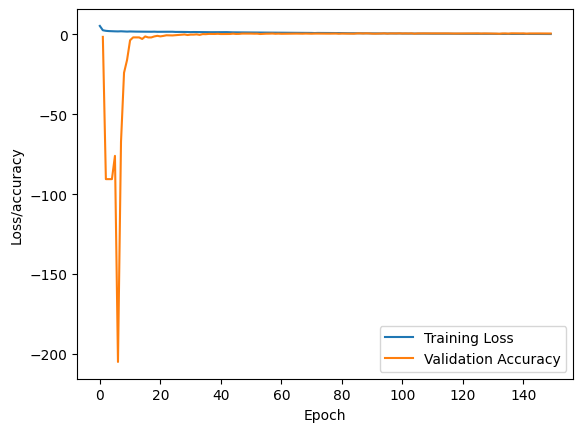

In [29]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # You can choose a different optimizer if you wish

# Resume a previous training session if applicable
if os.path.exists(CHECKPOINT_PATH):
    checkpoint = torch.load(CHECKPOINT_PATH)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    best_accuracy = checkpoint['accuracy']
    warnings.warn(f"\n\nFound model checkpoint at {CHECKPOINT_PATH}.\n"
                  f"Loaded model and optimizer from epoch {checkpoint['epoch']}.")
    warnings.warn(f"\n\nValidation accuracy: {checkpoint['accuracy']}")
    warnings.warn(f"\n\nLoss: {checkpoint['loss']}")
else:
    start_epoch = 1
    best_accuracy = float('-inf')
    warnings.warn("\n\nNo model checkpoint found.\nStarting from scratch.")

# IMPORTANT: Save/load the dataloaders to ensure same data order and data split across different runtimes
if os.path.exists(DATALOADER_PATH):
    checkpoint = torch.load(DATALOADER_PATH)
    train_dataloader = checkpoint['train_dataloader']
    val_dataloader = checkpoint['val_dataloader']
    test_dataloader = checkpoint['test_dataloader']
    warnings.warn(f"\n\nFound saved dataloaders at {DATALOADER_PATH}.\n"
                  f"Loaded dataloaders (specifying a previous data order and data slit).")
else:
    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_dataloader = DataLoader(val_data, batch_size=len(val_data), shuffle=False, collate_fn=collate_fn)
    test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, collate_fn=collate_fn)
    torch.save({
        'train_dataloader': train_dataloader,
        'val_dataloader': val_dataloader,
        'test_dataloader': test_dataloader,
    }, DATALOADER_PATH)
    warnings.warn("\n\nStarting with new data order and data slit.")


# Train the model
trained_model, loss_progress, val_progress = train_model(model, optimizer, train_dataloader, val_dataloader, epochs, best_accuracy)

# Plot the training loss and validation progression on the same graph over epochs
plt.plot(loss_progress, label='Training Loss')
plt.plot(val_progress, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/accuracy')
plt.legend()
plt.show()

In [30]:
# Get the model's R-squared score on the test data, this step should be quite
# similar to what we have for the validation phase above
test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, collate_fn=collate_fn)
model.eval()
with torch.no_grad():
  for batch in test_dataloader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    generate_outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=10)
    decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    try:
      predicted_values = [float(pred) for pred in decoded_preds]
      actual_values = [float(label) for label in decoded_labels]
      test_score = sklearn.metrics.r2_score(predicted_values, actual_values)
    except ValueError:
      test_score = float('-inf')
print(f"Test Accuracy: {test_score:.4f}")

Test Accuracy: 0.6868


# Part 3: Comparison Study
Let's look at alternative models commonly used in ML ([linear regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html), [decision tree learning](https://scikit-learn.org/1.5/modules/tree.html), [random forest, XG boost](https://scikit-learn.org/1.5/modules/ensemble.html)) and have proven to be very powerful in modeling large datasets. You might have already learned some of them in this and other AI/ML-topic courses. SKLearn provides a fast and convenient pipeline for us to load up different ML models and train/cross-validate them.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

def train_other_ML_models(X, y):
    for model in [LinearRegression(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  GradientBoostingRegressor()]:
        scores = cross_validate(model, X, y, cv=5, return_train_score=True)
        # Average over the different fold-divisions and print results
        print(f"{model.__class__.__name__}:")
        print(f"Train Accuracy: {scores['train_score'].mean():.4f}")
        print(f"Validation Accuracy: {scores['test_score'].mean():.4f}")
        print()


# Normalize the data for other ML models
numeric_features = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features.drop(columns=['MEDV']))

train_other_ML_models(
    X=scaled_features,
    y=numeric_features['MEDV']
)

LinearRegression:
Train Accuracy: 0.7493
Validation Accuracy: 0.3533

DecisionTreeRegressor:
Train Accuracy: 1.0000
Validation Accuracy: 0.1424

RandomForestRegressor:
Train Accuracy: 0.9832
Validation Accuracy: 0.6362

GradientBoostingRegressor:
Train Accuracy: 0.9788
Validation Accuracy: 0.6804



# Part 4: Final Report and Student's Reflection

### 1. Report ALL the hyperparameters you've used in training the T5 model on the Boston house price prediction task (e.g. what is the train-val-test split percentage? how many epochs did you train the model? etc.).
For the train-validation-test split I chose a 80%-10%-10% split which is a commonly used one. The other used hyperparameters are:
- learning rate: 1e-4. It's a tradeoff between a high learning rate (e.g. 1e-2) that ensures fast convergence but with possible overshooting and a small learning rate (e.g. 1e-5) that converges to the optimal value without overshooting but very slowly.
- epochs: 150. After some experiments I saw that it can be a good tradeoff between a significant impact on the overall performance and the computational complexity.
- batch size: 16. I chose a smaller batch size so that the updates are more frequent and it fits well with the 150 epochs so that it can slowly but steadily converge to the optimal value.
- weight decay: 1e-4. Used for regularization. I started with higher values but then I decreased it since I noticed it was performing better.

### 2. Did you try different values for each hyperparameter? What are they? Which value(s) you have found to be the best at helping the model reach higher test accuracy?
I tried many configurations for each hyperparameter:
- learning rate: I tried higher learning rates like 1e-2, the convergence was fast but noisy on higher epochs, I also tried lower values like 1e-5 but it was too slow to converge to a good value.
- epochs: I tried smaller values like 50 but it wasn't enough to achieve a good result. I then tried higher values like 150 and 250 to see if it could achieve better results. Since it's very computationally expensive I used the T4GPU on Google Colab to make the experiments run in a reasonable time.
- batch size: I tried the standard 64 and I reached good results, but then I tried to lower it to 16 and it got better.
- weight decay: I tried 1e-2 and then 1e-2. I noticed that with 1e-4 it performed better and the validation loss was constantly increasing without any big change in value towards higher epochs.

### 3. Report the final model training loss and its accuracy on the held-out test data.
Final model training loss: 0.1551

Final validation accuracy: 0.4713

Test accuracy: 0.6868

### 4. What is the model's test accuracy (R-squared score) if it always answers with the average value over the housing prices in the dataset regardless of the input features? Did your trained model do better than that score?
If the model always predicts the average value, 50% of the time it will predict a higher value and the remaining 50% it will predict a lower value. Assuming a uniform distribution of the values, we can say that the wrong prediction errors will cancel out, roughly giving an R-squared score of 0.

The trained model performs better than that reaching a final accuracy of 0.6868 > 0

### 5. There is no correct answer to this question. From your results, do you think it understands the human housing market? To what degree does it do/don't? how do you think the modality difference (the strict numerical pricing values versus the loosely defined textual price format) impacts the learning of our language model? did you notice highly discontinuous and erratic jumps in the model's validation score over the training epochs (e.g. it goes from -inf to -0.5 to -155.3 to 0.33, etc. in immediate steps)? why?
##### Hint: pay attention to how the model's inner workings are numerical computations (matrix multiplications and additions) but it must work with and adapt to discrete tokens at its input and output endpoints.
From the results, I think the model has a good but limited understanding of the housing market. I believe that the T5 model is not the best choice for this type of task, since it is good at performing text-like tasks and this is not the case since we're dealing with numerical values. I think that there are other models that better fit this type of problem (like decision trees). Despite that, it's true that it still achieves a good result almost reaching 69% of test accuracy.

I noticed some discontinuous jumps in the model's validation score. My guess about the reason it happens is that we're dealing with numerical values that are mapped to tokens (discretized) so this mapping could lose some useful information/relation between numerical values.

### 6. What part of the T5's pre-trained internet data you think might have helped its performance on our Boston house price prediction task?
The data used to pretrain the model might include many real-estate information so the model could have captured some general domain knowledge useful to the prediction task. An example is that it could have been trained on some articles or forums discussing about the most important features to determine the final price so it exploited this inferred information to improve the predictions.

### 7. What part of the T5's pre-trained internet data you think might have hurt its performance on our Boston house price prediction task?
Due to the vast diversity of the internet data it might happen that the model chose to represent the numerical values in a wrong way, or in a non proper way so that it didn't capture many important information. An example is the numerical precision or the fact that in some domains/contexts the values 1 and 2, for instance, might be considered as very different things, while for most of our dataset's input features, they are not.

### 8. Did you observe the model overfitting (complete memorization of) our training data? how do you know it did/didn't?
I noticed the model overfitting in the first versions of the model I tried. In fact, the validation accuracy (after a while) started going back down, while the training one was improving. This is a clear sign of overfitting. For this reason, I decided to introduce in the following models a fix to this issue by adding regularization. I tried a couple of values for the weight decay until I got to a point where the model performance didn't suggest a strong presence of overfitting anymore. It's important to notice that despite that, a bit of overfitting was still present since it's hard to totally get rid of it.

### 9. What is the perfect number of training epochs that you would use to prevent your model from overfitting this task? why?
#####   - If it is impossible to prevent overfitting, explain why you think so.
#####   - If it's trivial for the model to never overfit, explain why you think so.
In general, choosing a high number of epochs leads to overfitting since we're leaving the model too much time to learn the noise present in the data rather than the actual underlying distribution.

It's impossible (for me) to totally prevent overfitting. The best we can do is to minimize its impact on the model's performance. In my case, we can see from the results that the actual best performance was found at epoch 122, but the final one is not that far off, though. For this reason we could say that this model still has overfitting and the optimal epoch to stop in this case would have been 122.

Another thing to notice is that the Boston housing dataset has around 500 samples so it's a relatively small dataset. On the other hand, T5 model has a huge number of parameters which could suggest that the model tries to learn very specific details and information about the dataset making the role of regularization and cross-validation very hard and also making overfitting quite impossible to avoid.

### 11. How do you think you can improve the training algorithm or the dataset design or the model choice to do better at our Boston house price prediction task? what nuances you think is important in considering these choices?
To improve the model performance I tried to reduce the impact of overfitting by adding regularization setting weight decay to 1e-4.

Then I tried many different configurations to find the best tuning for the hyperparameters. I found that by choosing a moderate number of epochs (150) with a small learning rate (1e-4) the model smoothly reaches a good result.

I also tried to implement early-stopping technique to prevent overfitting but it was hard to find good parameters to make it perform better than the current model.

I also tried to use the learning rate scheduler to adjust the learning rate during the training process but it didn't show any significant improvement in the model's performance.

### 12. Report the results of your comparison study (between the T5 with each of the other ML models)
T5:

Train Loss: 0.1551

Validation Accuracy: 0.4713

LinearRegression:

Train Accuracy: 0.7493

Validation Accuracy: 0.3533

DecisionTreeRegressor:

Train Accuracy: 1.0000

Validation Accuracy: 0.1424

RandomForestRegressor:

Train Accuracy: 0.9832

Validation Accuracy: 0.6362

GradientBoostingRegressor:

Train Accuracy: 0.9788

Validation Accuracy: 0.6804

By looking at the validation accuracies we can say that the T5 model performs better than simple models like linear regressor and decision tree, and it has similar performance to the two ensemble models.

### 13. Why do you think each ML model does better/worse than the other? is your trained T5 achieving a better accuracy than some/all the other models? why do you think it might be doing better/worse than some/all of the other ML models?
By looking at the final validation accuracies, we can say that Gradien Boosting got the best performance, followed by Random Forest, Linear Regression and Decision Tree.

The fact that the T5 model performs better than simple models like linear regressor and decision tree, suggests that these models could be too simple to capture all the needed information to get to good results. On the other hand, it performs roughly the same as the two ensemble models, meaning that these models can capture as much useful information as the T5 model while preventing overfitting.

Random Forest is an ensemble model that uses decision trees as base models, but it's able to achieve a 3-times better result than the simple decision tree model. This could be due to the fact that the Random Forest model, being a bagging model, can significantly reduce overfitting.

### 14. Considering the training time and inference time of our T5 model versus the other ML models, do you think the accuracy that our T5 achieves was worth it? why?
Considering all the reasoning done before, I think that, overall, the T5 model is not the best solution.

For this specific type of task, I believe that an ensemble model like Gradient Boosting performs better, also taking into account that it takes way less time to train.

We also need to consider that the results obtained by the T5 model are "optimal" (hoping that my parameter tuning process was an optimal choice), while the ML ensemble models used to compare the results (especially Random Forest and Gradient Boosting) were used in their standard form without any particular parameter choice, suggesting that they could achieve even better results with some further adjustments.

# Part 5: Submission (Deadline: before class - 9 AM at December 6th, 2024)

We expect you to complete the TODOs, run all the code cells, and have the final outputs of those cells displayed in your submission. Your submission file should be a single .ipynb file (openable to Jupyter Notebook and Google Colab).

Please submit your file to the course Blackboard.